<a href="https://colab.research.google.com/github/NiviShukla/Data-Analyst---Test-Data/blob/main/Data_Analyst_Test_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import nltk
import re
from nltk.corpus import stopwords
import string
from google.colab import files
uploaded = files.upload()

data = pd.read_csv("Data Analyst - Test Data.csv")
print(data.head())

Saving Data Analyst - Test Data.csv to Data Analyst - Test Data (1).csv
                                              Review        date     Location
0  I was very impressed with the resort.\n Great ...  2019/08/20    Sebastian
1  The rooms were nice the outside needs work als...  2019/08/20  Los Angeles
2  Great location! I have stayed at this hotel on...  2019/08/20      Georgia
3  The hotel was adequate for my stay. The strips...  2019/08/20          NaN
4  Great location, room was large and spacious. P...  2019/08/19  Palm Harbor


In [14]:
data = data[["Review", "date", "Location"]]
data.isnull().sum()

Review        55
date           0
Location    4737
dtype: int64

In [15]:
data["Review"].value_counts()
data['Review'] = data['Review'].str.replace(r'Read more|Read less', '', regex=True)


In [16]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stemmer = nltk.SnowballStemmer("english")
stopword=set(stopwords.words('english'))

def clean(text):
    text = str(text).lower()
    text = re.sub('', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in stopword]
    text=" ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text=" ".join(text)
    return text
data["Review"] = data["Review"].apply(clean)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


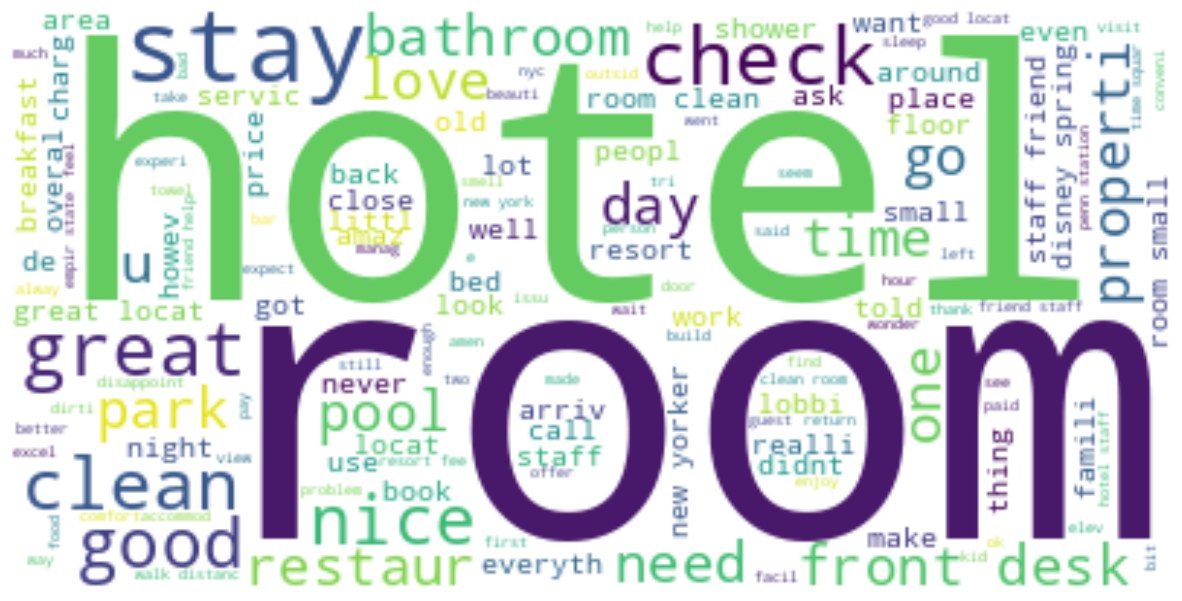

In [17]:
text = " ".join(i for i in data.Review)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [18]:
nltk.download('vader_lexicon')
sentiments = SentimentIntensityAnalyzer()
data["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in data["Review"]]
data["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in data["Review"]]
data["Neutral"] = [sentiments.polarity_scores(i)["neu"] for i in data["Review"]]
data = data[["Review", "Positive", "Negative", "Neutral"]]
print(data.head())

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


                                              Review  Positive  Negative  \
0  impress resort great staff main resort pool ba...     0.556     0.000   
1  room nice outsid need work also free breakfast...     0.581     0.000   
2  great locat stay hotel last three trip new yor...     0.339     0.000   
3  hotel adequ stay strip bathtub useless fell ta...     0.122     0.127   
4  great locat room larg spacious park easi appre...     0.477     0.000   

   Neutral  
0    0.444  
1    0.419  
2    0.661  
3    0.751  
4    0.523  


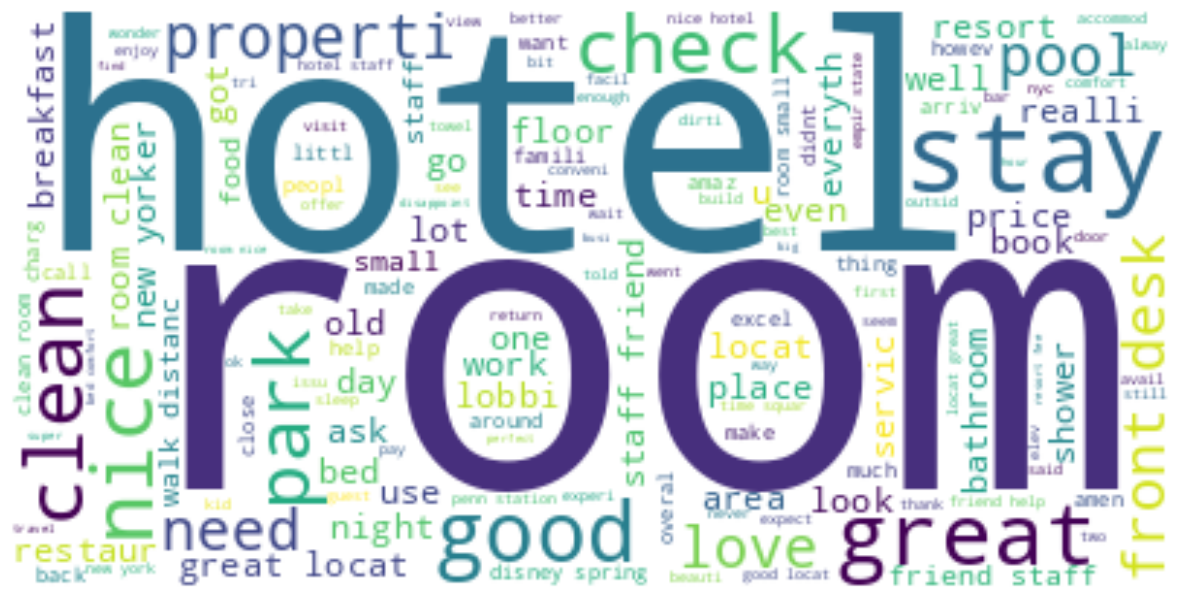

In [19]:

positive =' '.join([i for i in data['Review'][data['Positive'] > data["Negative"]]])
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(positive)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [39]:
def calculate_overall_sentiment(row):
    if row["Positive"] > row["Negative"]:
        return "Positive"
    elif row["Negative"] > row["Positive"]:
        return "Negative"
    else:
        return "Neutral"

data["Overall Sentiment"] = data.apply(calculate_overall_sentiment, axis=1)
print(data.head())

                                              Review  Positive  Negative  \
0  impress resort great staff main resort pool ba...     0.556     0.000   
1  room nice outsid need work also free breakfast...     0.581     0.000   
2  great locat stay hotel last three trip new yor...     0.339     0.000   
3  hotel adequ stay strip bathtub useless fell ta...     0.122     0.127   
4  great locat room larg spacious park easi appre...     0.477     0.000   

   Neutral Overall Sentiment  
0    0.444          Positive  
1    0.419          Positive  
2    0.661          Positive  
3    0.751          Negative  
4    0.523          Positive  


In [40]:
data = data.dropna(subset=['Review'])  # Remove rows with missing "Review" values
data['Review'] = data['Review'].fillna('')  # Fill missing values with an empty string


In [43]:
from sklearn.feature_extraction.text import CountVectorizer

# Check for and handle missing values and non-text data
data['Review'] = data['Review'].astype(str)  # Convert all values to strings
data['Review'] = data['Review'].fillna('')  # Fill missing values with an empty string

# Tokenize and analyze review content
vectorizer = CountVectorizer(max_features=10)  # You can adjust max_features to get more or fewer keywords
X = vectorizer.fit_transform(data["Review"])
keywords = vectorizer.get_feature_names_out()

print("Top Keywords in Reviews:")
print(keywords)


Top Keywords in Reviews:
['clean' 'good' 'great' 'hotel' 'locat' 'nice' 'park' 'room' 'staff'
 'stay']


In [22]:
average_positive = data["Positive"].mean()
average_negative = data["Negative"].mean()
average_neutral = data["Neutral"].mean()

print("Average Positive Score:", average_positive)
print("Average Negative Score:", average_negative)
print("Average Neutral Score:", average_neutral)


Average Positive Score: 0.2731107320099256
Average Negative Score: 0.04074534739454094
Average Neutral Score: 0.6856805210918114


In [32]:
# Strip any leading/trailing white spaces from column names
data.columns = data.columns.str.strip()

# Group by 'Location' and calculate average sentiment scores for each location
data.head()
df = pd.read_csv("Data Analyst - Test Data.csv")
print(df.head())

# Group by 'Location' and calculate average sentiment scores for each location
# Assuming 'data' and 'df' are the two DataFrames you want to merge

# Merge based on the 'Review' column
merged_data = data.merge(df, on='Review', how='inner')  # Change 'how' as needed (e.g., 'inner', 'outer', 'left', 'right')

# Print the merged DataFrame
print(merged_data)



                                              Review        date     Location
0  I was very impressed with the resort.\n Great ...  2019/08/20    Sebastian
1  The rooms were nice the outside needs work als...  2019/08/20  Los Angeles
2  Great location! I have stayed at this hotel on...  2019/08/20      Georgia
3  The hotel was adequate for my stay. The strips...  2019/08/20          NaN
4  Great location, room was large and spacious. P...  2019/08/19  Palm Harbor
                 Review  Positive  Negative  Neutral Overall Sentiment  \
0              ·the bed       0.0       0.0      1.0           Neutral   
1  ·الفندق اكثر من رائع       0.0       0.0      1.0           Neutral   

         date                  Location  
0  2019/07/31  United States of America  
1  2019/07/20                    Kuwait  


In [33]:
# Group by 'Location' and calculate average sentiment scores for each location in merged_data
location_sentiment = merged_data.groupby('Location').agg({
    'Positive': 'mean',
    'Negative': 'mean',
    'Neutral': 'mean'
}).reset_index()

# Print the sentiment analysis results by location
print(location_sentiment)


                   Location  Positive  Negative  Neutral
0                    Kuwait       0.0       0.0      1.0
1  United States of America       0.0       0.0      1.0


In [34]:
# Filter the merged_data DataFrame to select negative sentiment reviews
negative_reviews = merged_data[merged_data['Overall Sentiment'] == 'Negative']

# Extract and analyze text from negative reviews
negative_text = ' '.join(negative_reviews['Review'])
# You can use natural language processing techniques to perform keyword extraction, e.g., using NLTK or spaCy

# Print the most common keywords or phrases from negative reviews
print("Keywords/Phrases in Negative Reviews:")
# Implement your keyword extraction code here


Keywords/Phrases in Negative Reviews:


In [35]:
print(merged_data.head())

                 Review  Positive  Negative  Neutral Overall Sentiment  \
0              ·the bed       0.0       0.0      1.0           Neutral   
1  ·الفندق اكثر من رائع       0.0       0.0      1.0           Neutral   

         date                  Location  
0  2019/07/31  United States of America  
1  2019/07/20                    Kuwait  
